In [1]:
import sys
import os

# modify syspath directory to sys.path

package_path = os.path.abspath(os.path.join('..','core'))
if package_path not in sys.path:
    sys.path.append(package_path)

package_path = os.path.abspath(os.path.join('..','utils'))
if package_path not in sys.path:
    sys.path.append(package_path)

package_path = os.path.abspath(os.path.join('..'))
if package_path not in sys.path:
    sys.path.append(package_path)

import numpy as np
import qutip as qt
import math
import matplotlib.pyplot as plt

from IPython.display import HTML # both needed to disply gifs
from PIL import Image

# Import modules from the package
from core import create_hamiltonian as ch
from core import create_state as cs
from core import create_coherent_state
from core import time_evo
from core import time_evo_new
from core import time_evo_from_state
from core import load_param
from core import load_H_list
from core import load_result
from core import load_tlist
from core import operators
from core.schmidt_solve import compute_schmidt_states_all_time
from core.eigen_ener_states import eigen_ener_states as eig
from core import annihilation_operator
from utils.entropy import compute_VN, plot_VN, compute_VN_time
from utils import collapse_gif
from utils.collapse_gif import collapse_gif
from utils.display_gif import display_gif
from utils.distribution_gif import gif_distribution_eig_total
from utils.distribution_gif import prob_gif
from utils.distribution_gif import gif_distrib_H_s_int
from utils.distribution_gif import gif_distrib_system_first_eig
from utils.distribution_gif import gif_distrib_system_first_second
from utils.plot import plot_basic
from utils.plot import plot_with_binning
from utils.basic_functions import state_distribution_eig_tot
from utils.basic_functions import random_dephasing
from utils.basic_functions import get_state_probabilities
from utils.basic_functions import position
from utils.basic_functions import copy_cat
from utils.overlap import overlap
from utils.overlap import gif_schmidt_overlap
from utils.interference import interference_plot
from utils.expectations import exp_val_time
from utils.plot_hamiltonians import plot_hamiltonians



In [2]:
#Strong interaction limit

d1=20;d2=200;E_s=0.1; E_s2=0; E_int_s=1; E_int_e=0.5;E_int_s2=0;E_int_e2=0; E_e=0.1; E_e2=0;envi=[0]; tmax= 20; ind_nb = 60;log=1
file_name = "strong_interaction_limit"

coherent_state=create_coherent_state(d1,2)

result, tlist, H_list, state, info = time_evo_from_state(coherent_state,d1,d2,E_s,E_s2,E_int_s,E_int_e,E_int_s2,E_int_e2,E_e,E_e2,envi,tmax,ind_nb,log,file_name)

d1, d2, E_s, E_s2, E_int_s, E_int_e, E_int_s2, E_int_e2, E_e, E_e2, envi, tmax, ind_nb, log = load_param(file_name)
info = load_param(file_name)
H_list=load_H_list(file_name)
result=load_result(file_name)
tlist=load_tlist(file_name)

../outputs/gifs/rho_s_first_eig_distrib_in_H_int_s_gif_strong_interaction_limit.gif


../outputs/gifs/rho_s_first_eig_distrib_in_H_int_s_gif_strong_interaction_limit.gif


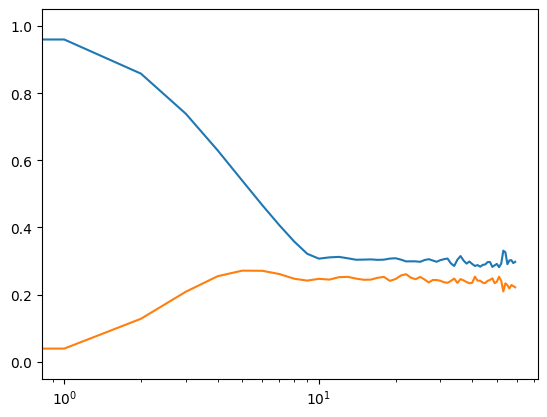

In [3]:
#Visualizing the einselection:

eigenenergies1_list=[]
eigenenergies2_list=[]

for i in range(ind_nb):
    rho_s=qt.ptrace(result.states[i], [0])
    eigenenergies, eigenstates = rho_s.eigenstates()
    eigenenergies1_list.append(eigenenergies[d1-1])
    eigenenergies2_list.append(eigenenergies[d1-2])

plt.plot(eigenenergies1_list)
plt.plot(eigenenergies2_list)
plt.xscale('log')


path = gif_distrib_system_first_eig(d1,H_list,result,ind_nb, file_name)
print(path)
display_gif(path)
file_name=file_name+"second"
path = gif_distrib_system_first_second(d1,H_list,result,ind_nb, file_name)
print(path)
display_gif(path)

In [ ]:
#Weak interaction limit

d1=20;d2=200;E_s=1; E_s2=0; E_int_s=0.2; E_int_e=0.2;E_int_s2=0;E_int_e2=0; E_e=1; E_e2=0;envi=[0]; tmax= 20; ind_nb = 60;log=1
file_name = "strong_interaction_limit"

coherent_state=create_coherent_state(d1,2)

result, tlist, H_list, state, info = time_evo_from_state(coherent_state,d1,d2,E_s,E_s2,E_int_s,E_int_e,E_int_s2,E_int_e2,E_e,E_e2,envi,tmax,ind_nb,log,file_name)

d1, d2, E_s, E_s2, E_int_s, E_int_e, E_int_s2, E_int_e2, E_e, E_e2, envi, tmax, ind_nb, log = load_param(file_name)
info = load_param(file_name)
H_list=load_H_list(file_name)
result=load_result(file_name)
tlist=load_tlist(file_name)